# Multicategory  PTA  for  digit  classification. Multicategory PTA is a simple extension of PTA for multiple output classes

In [1]:
import struct
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
def step_function(val):
    for i in range(len(val)):
        if val[i] >= 0:
            val[i] = 1
        else:
            val[i] = 0
    return val

Read the contents of the webpage
http://yann.lecun.com/exdb/mnist/
There  are  4  files  listed  in  the  beginning  of  the  page  as
training set images,training setlabels,test set images, and test set labels, download them. Each image is 28×28, so that we will have a neural network 28×28 = 784 nodes in the input layer,
and 10 nodes in the output layer.  We will ignore the biases.  We wish to find 784×10 = 7840
weights  such  that  the  network  outputs  [1 0 0···0]T if  the  input  image  corresponds  to  a  0,
[0 1 0···0]T if the input image corresponds to a 1, and so on.
I have used the first n(n≤60000) elements of training set images and training set labels
to  train  our  network  via  the  multicategory  perceptron  training  algorithm.   Since  the  patterns
are  not  linearly  separable,  the  misclassification  errors  may  not  converge  to  0.  
We will need to stop the iterations (epochs) when the ratio of misclassified
input patterns falls below some threshold.

In [3]:
def read_img_idx(file):
    f = open(file,'rb')
    data = f.read(16)
    magic, no_items, no_rows, no_cols = struct.unpack('>IIII',data)
    img_arr = np.zeros((no_items, no_rows, no_cols))
    no_bytes = no_items * no_rows * no_cols
    img_arr =  np.asarray(struct.unpack('>'+'B'*no_bytes,f.read(no_bytes))).reshape((no_items,no_rows,no_cols))
    return img_arr

In [4]:
def read_lbl_idx(file):
    f = open(file, 'rb')
    data = f.read(8)
    magic, no_items = struct.unpack('>II', data)
    lbl_arr = np.zeros(no_items)
    no_bytes = no_items
    lbl_arr = np.asarray(struct.unpack('>'+'B'*no_bytes, f.read(no_bytes)))
    return lbl_arr

In [5]:
def misclass_error(w,err,epo):
    for i in range(n):
        v = np.matmul(w,X_train[i])
        actual_v = np.argmax(v)
        if actual_v != Y_train[i]:
            err[epo] += 1
    return err[epo]
            

In [6]:
def update_weights(wei):
    for i in range(n):
        d_out = np.zeros((10,1))
        d_out[Y_train[i]] = 1
        a_out = step_function(np.matmul(wei,X_train[i]))
        change = learning_rate * (d_out - a_out) * X_train[i].T
        wei += change
    return wei

In [21]:
def handler(w):
    epoch = 0
    error = []
    while True:
        error.append(0)
        error[epoch] = misclass_error(w,error,epoch)
        epoch += 1
        w = update_weights(w)
        if error[epoch-1]/n <= threshold:
            return error

In [26]:
def handler_nc(w):
    epoch = 0
    error = []
    while epoch < 25:
        error.append(0)
        error[epoch] = misclass_error(w,error,epoch)
        epoch += 1
        w = update_weights(w)
    return error

In [8]:
def plot(err):
    plt.figure(figsize=(10,10))
    plt.plot(range(len(err)), err, c = 'red')
    plt.ylabel('Number of Misclassifications')
    plt.xlabel('Number of Epochs')
    plt.title('Errors vs Epochs')
    plt.show()

In [9]:
X_train = read_img_idx('train-images.idx3-ubyte')
Y_train = read_lbl_idx('train-labels.idx1-ubyte')
X_test = read_img_idx('t10k-images.idx3-ubyte')
Y_test = read_lbl_idx('t10k-labels.idx1-ubyte')

In [10]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [11]:
Y_train.shape, Y_test.shape

((60000,), (10000,))

In [12]:
X_train = [x.reshape(784,1) for x in X_train]

In [13]:
X_test = [x.reshape(784,1) for x in X_test]

 We now have some (hopefully) good weights that we have obtained via the multicategory PTA
above.  We now test the corresponding network on the test set images and test set labels.


In [14]:
def misclass_error_test(w,err,epo):
    for i in range(10000):
        v = np.matmul(w,X_test[i])
        actual_v = np.argmax(v)
        if actual_v != Y_test[i]:
            err[epo] += 1
    return err

For n = 50, η = 1, and some very small epsillon = 0.

In [101]:
# Training part
learning_rate = 1
threshold = 0
n = 50
weights = np.random.uniform(-1, 1, (10,784))
e = handler(weights)

[42]
[42, 7]
[42, 7, 2]
[42, 7, 2, 1]
[42, 7, 2, 1, 0]


For the training part, the algorithm converges and hence the misclassifications for the training are 0 %

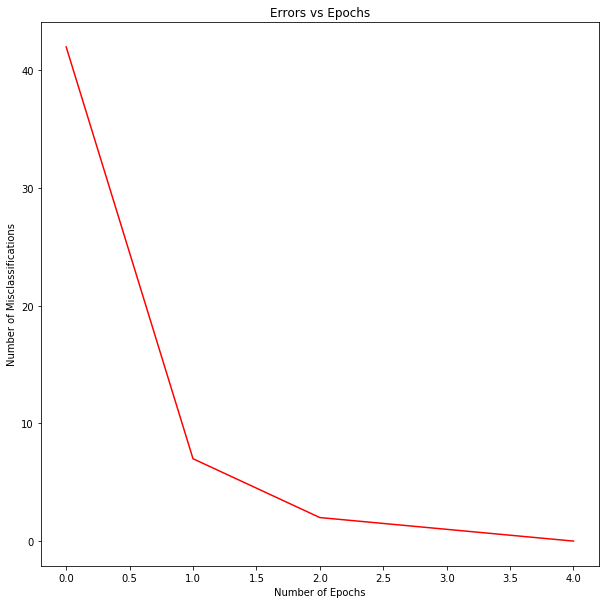

In [102]:
plot(e)

In [103]:
# Testing part
error_t = [] 
epo_t = 0
error_t.append(0)
e = misclass_error_test(weights, error_t, epo_t)
e[0]/10000

0.4538

We get an error percentage of 45.38% for n = 50, learning rate = 1 and threshold = 0 on the test data of 10000 samples.
The error percentage for training is 0% as the algo converged completely for n = 50 samples in the training set and for the testing the error percent is 45.38% which is bigger as the weights are arranged for the algo is only based on the 50 samples of the training set.

For n =  1000, η =  1,  and  some  very  small threshold =  0.

In [121]:
# Training part
learning_rate = 1
threshold = 0
n = 1000
weights = np.random.uniform(-1, 1, (10,784))
e = handler(weights)

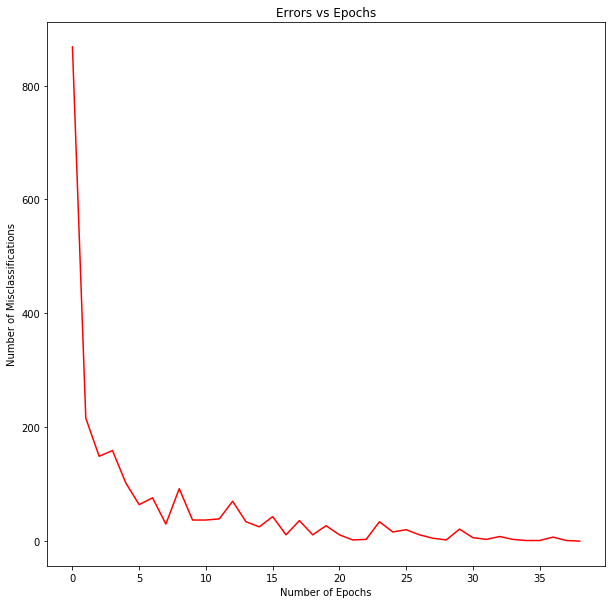

In [122]:
plot(e)

Again the algorithm converges to 0 and hence the misclassifications for the training are 0 % for 1000 samples. 

In [123]:
# Testing part
error_t = [] 
epo_t = 0
error_t.append(0)
e = misclass_error_test(weights, error_t, epo_t)
e[0]/10000

0.1772

Error percentage for the testing data is 17.72 percent for n = 1000 which is better than previous step(for n = 50) as 
the sample set for the training increased and the model learnt well from more samples. So the model performs better as the training data increases.

For n =  60000  and threshold =  0.   

In [27]:
# Training part
learning_rate = 1
threshold = 0
n = 60000
weights = np.random.uniform(-1, 1, (10,784))
e = handler_nc(weights)

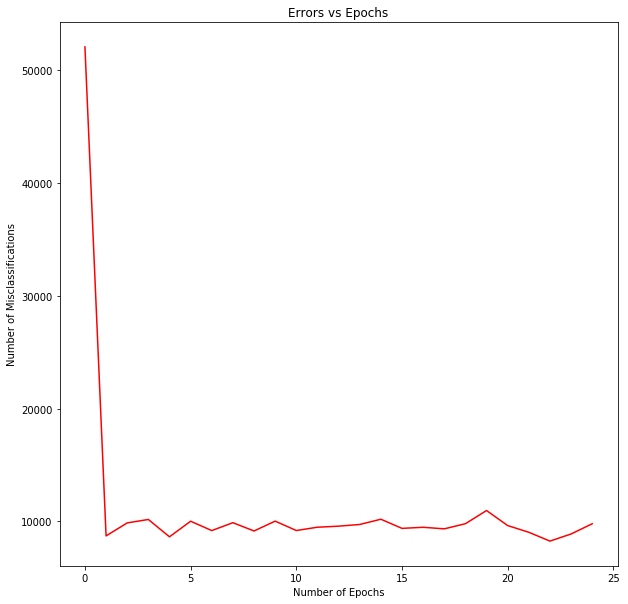

In [28]:
plot(e)

For n = 60000 and threshold = 0, the algo does not converge at 0. For non converging algo, epoch
is 25. And the algo converges to around 7000.

In [29]:
# Testing part
error_t = [] 
epo_t = 0
error_t.append(0)
e = misclass_error_test(weights, error_t, epo_t)
e[0]/10000

0.137

On the test data, we get error percentage around 13.7 % for the non converging algo.

For learning rate = 1, threshold = 0.15 and n = 60000.

In [30]:
learning_rate = 1
threshold = 0.15
n = 60000
weights = np.random.uniform(-1, 1, (10,784))
e = handler(weights)

[53726, 10040, 8474]


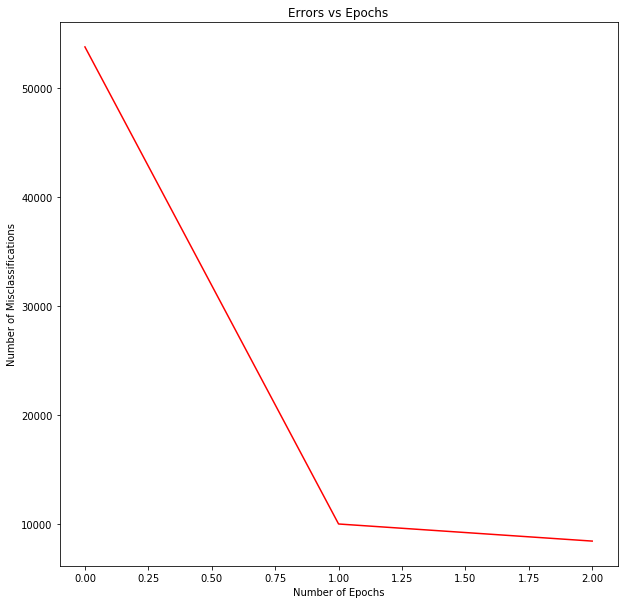

In [31]:
plot(e)

Error percentage is 14.12% for the training part

In [32]:
error_t = [] 
epo_t = 0
error_t.append(0)
e = misclass_error_test(weights, error_t, epo_t)
e[0]/10000

0.1703

Error percentage for the testing part is 17.03%

In [33]:
learning_rate = 1
threshold = 0.15
n = 60000
weights = np.random.uniform(-1, 1, (10,784))
e = handler(weights)

[53144, 9995, 9947, 9539, 9593, 10425, 9422, 9933, 8634]


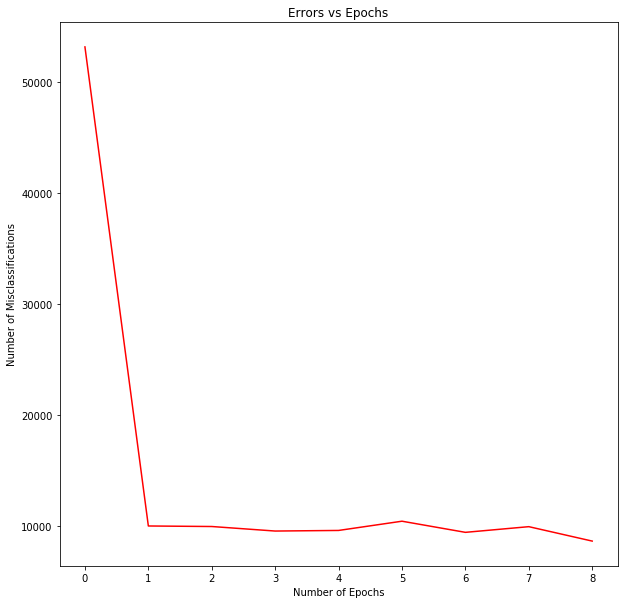

In [34]:
plot(e)

Error percentage is 14.39% for the training part

In [35]:
error_t = [] 
epo_t = 0
error_t.append(0)
e = misclass_error_test(weights, error_t, epo_t)
e[0]/10000

0.1525

Error percentage for the testing part is 15.25%

In [38]:
learning_rate = 1
threshold = 0.15
n = 60000
weights = np.random.uniform(-1, 1, (10,784))
e = handler(weights)

[55694, 9107, 8664]


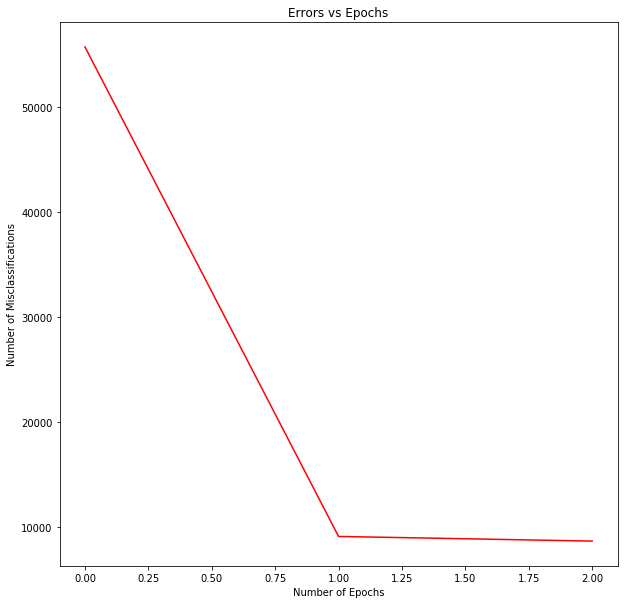

In [39]:
plot(e)

Error percentage for the training part is 14.41%

In [40]:
error_t = [] 
epo_t = 0
error_t.append(0)
e = misclass_error_test(weights, error_t, epo_t)
e[0]/10000

0.1583

Error percentage for the testing part is 15.83%.

From the last three graphs we can see that the error percents for the testing data is around 15%